In [1]:
!nvidia-smi

Fri May 19 14:52:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3WnZDr6Mvsr7ASpMwNWJ")
project = rf.workspace("drone-detection-pexej").project("drone-detection-tasyk")
dataset = project.version(1).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.105, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Drone-Detection-1 in yolov8:: 100%|██████████| 32/32 [00:00<00:00, 5865.13it/s]


In [2]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 73.1MB/s]
Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Drone-Detection-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fals

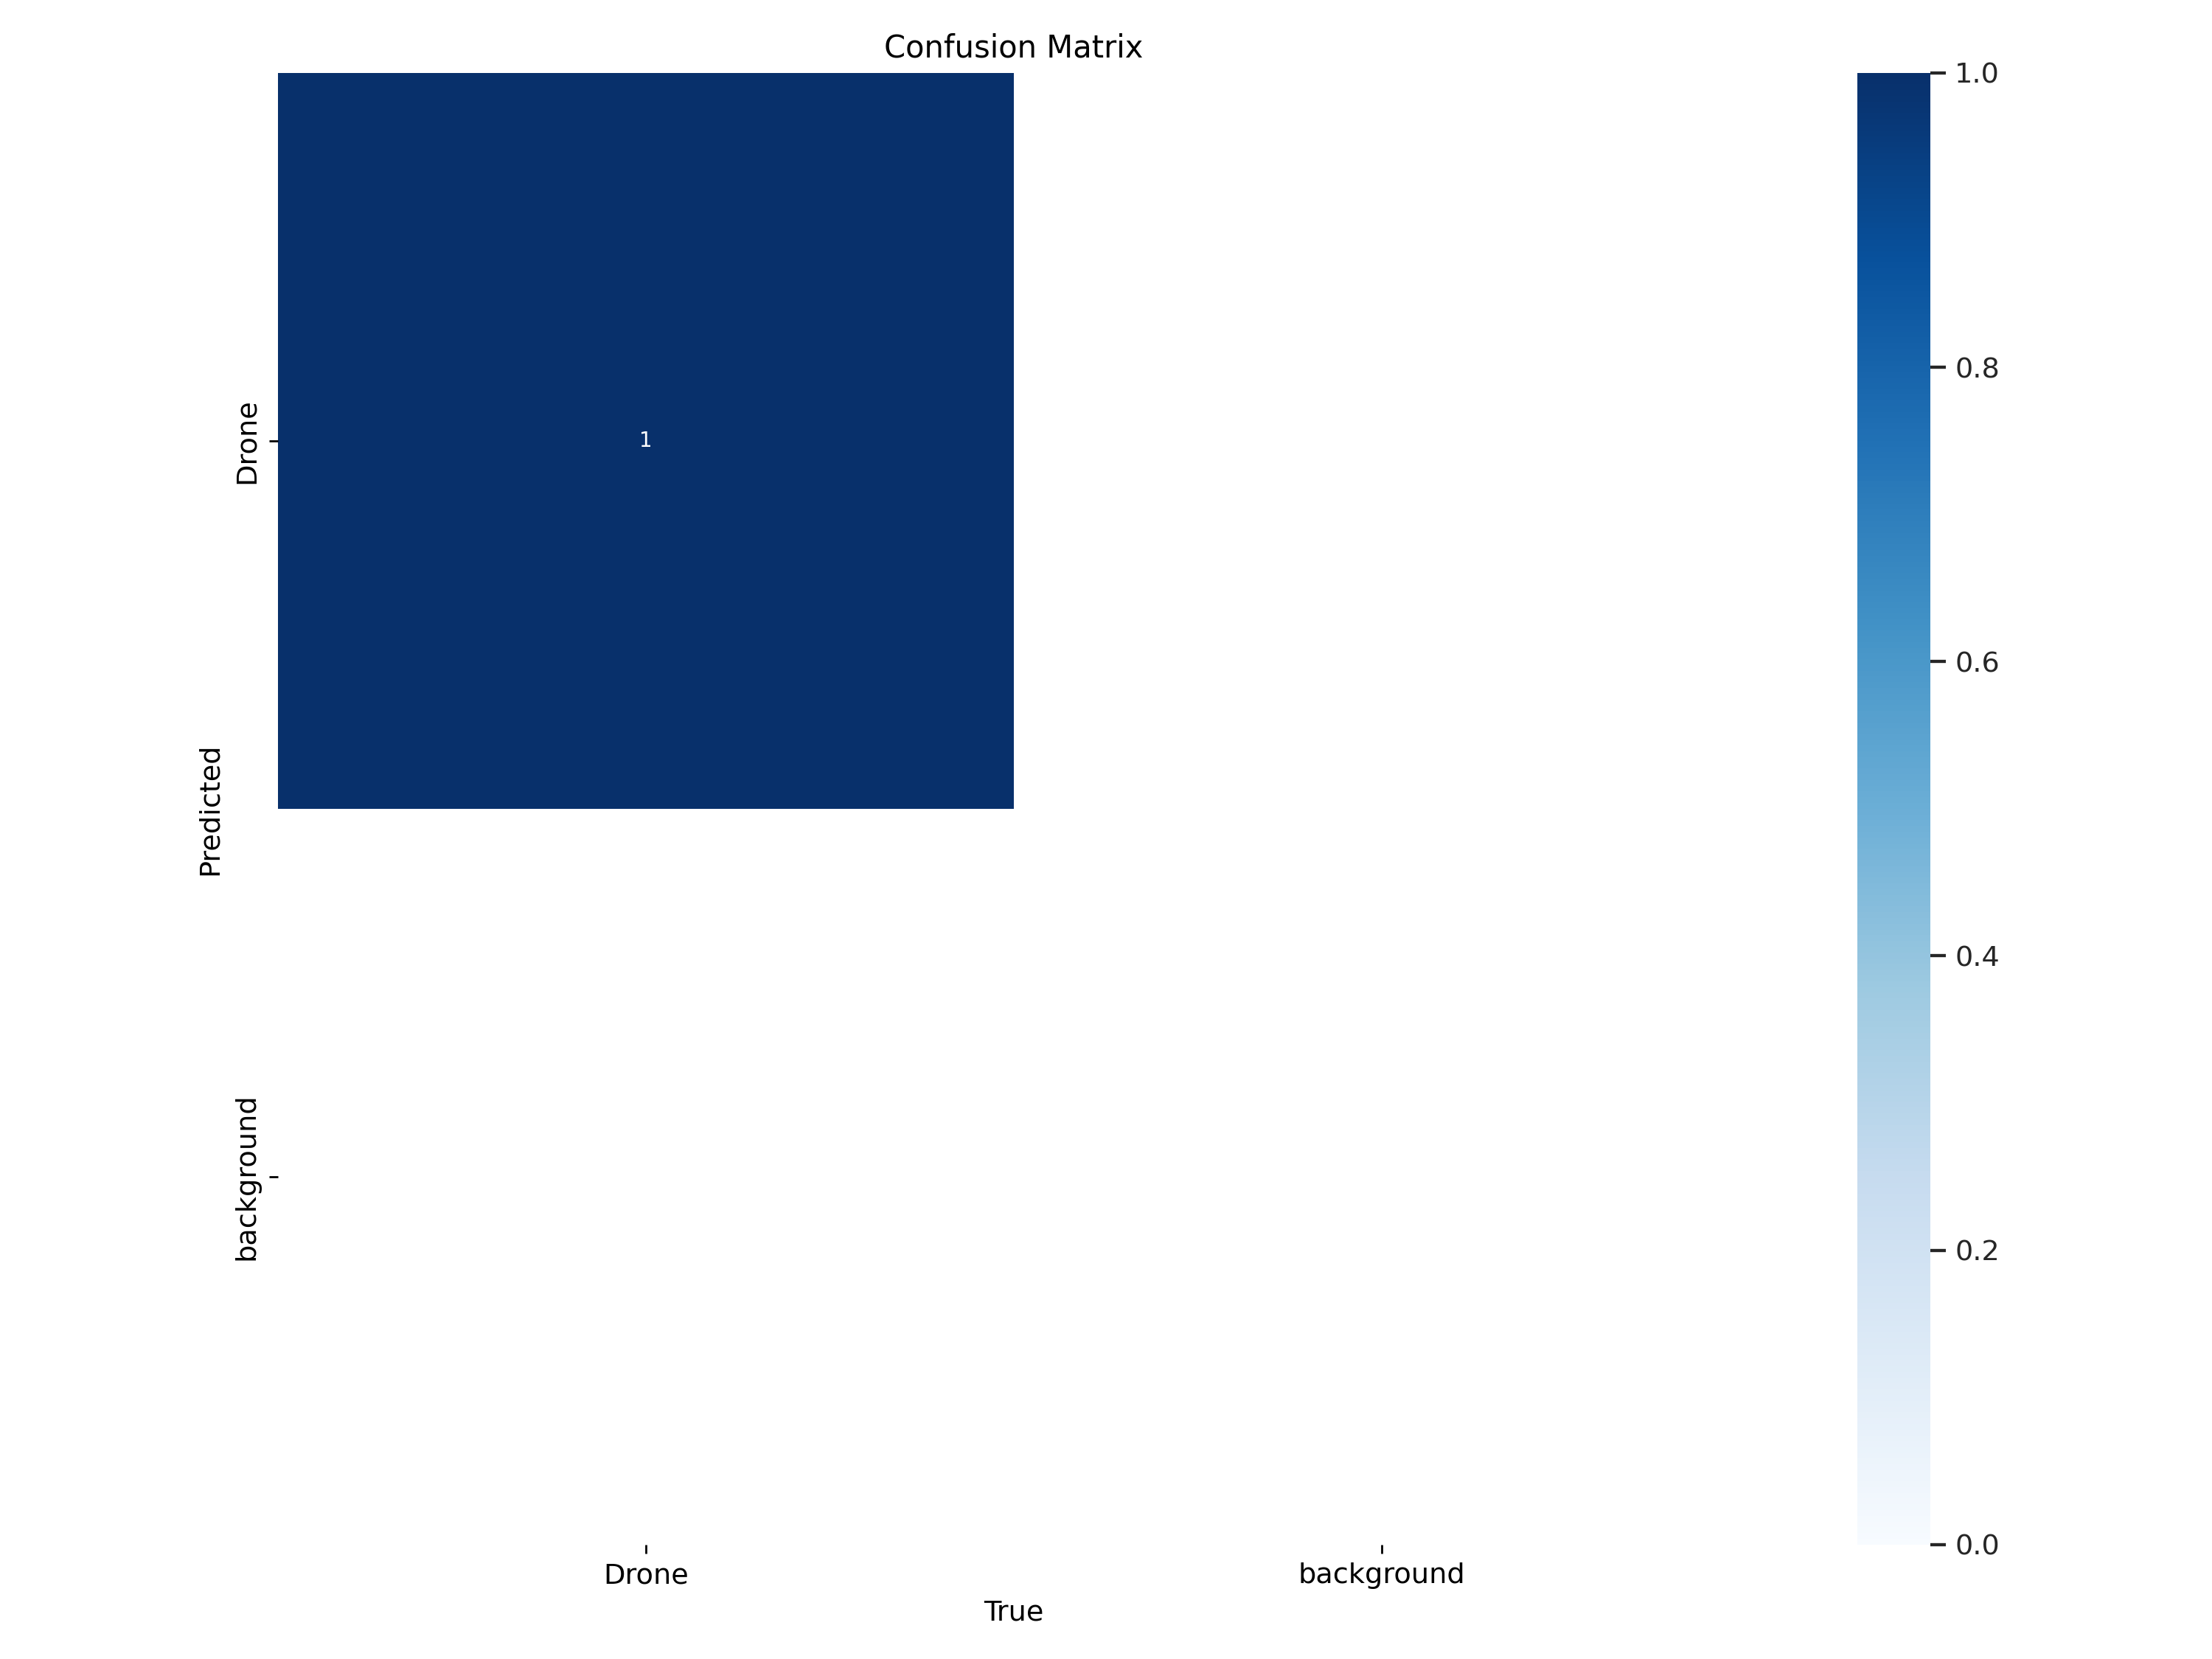

In [13]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

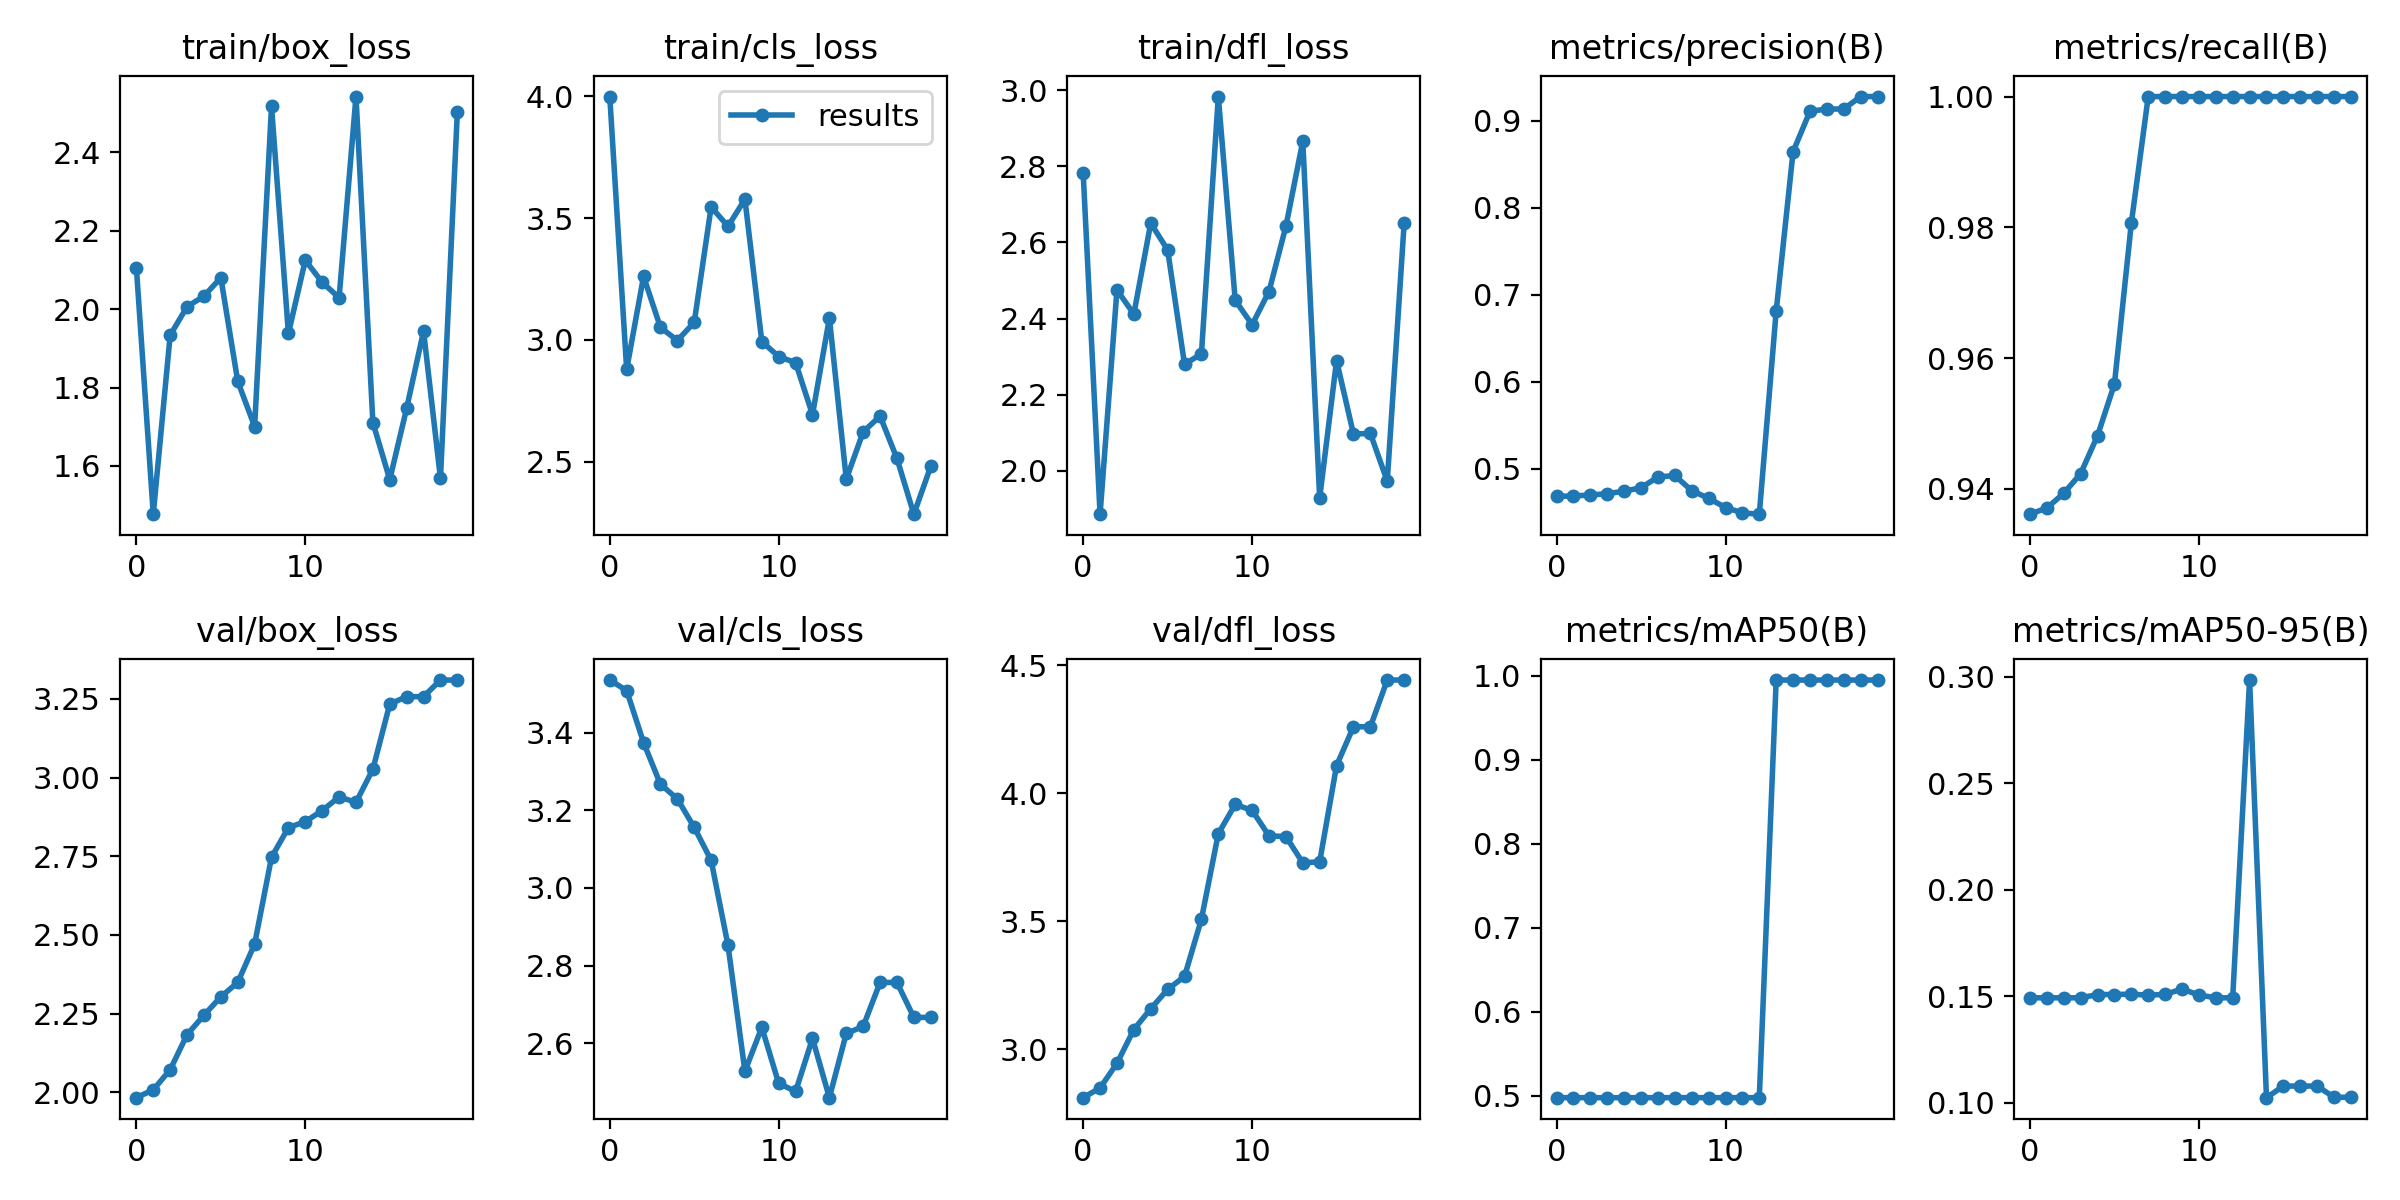

In [14]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [15]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients
val: Scanning /content/Drone-Detection-1/valid/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100% 1/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00, 12.24it/s]
                   all          1          1      0.672          1      0.995      0.298
Speed: 0.4ms preprocess, 62.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.0.49 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs

image 1/20 /content/FridgeSimple-1/test/images/101_png_jpg.rf.2fb16c76268e109093fab060c45f7175.jpg: 640x640 1 coffee, 1 energy_drink, 1 pudding, 1 rice_ball, 1 tea_a, 1 tea_i, 1 yogurt, 37.3ms
image 2/20 /content/FridgeSimple-1/test/images/102_png_jpg.rf.397c6b110a551a27e9d0c8182bccc8bd.jpg: 640x640 1 coffee, 1 energy_drink, 1 pudding, 1 rice_ball, 1 tea_a, 1 tea_i, 1 yogurt, 35.7ms
image 3/20 /content/FridgeSimple-1/test/images/103_png_jpg.rf.ab89a8a9889902cdab590cecd4ef6447.jpg: 640x640 1 energy_drink, 1 pudding, 1 rice_ball, 1 smoothie, 1 tea_a, 1 tea_i, 1 yogurt, 33.2ms
image 4/20 /content/FridgeSimple-1/test/images/104_png_jpg.rf.94f8a97e0180ed0f7a8a5bd7aa73a7ca.jpg: 640x640 2 energy_drinks, 1 pudding, 1 rice_ball, 1 tea_a, 1 tea_i, 1 yogurt, 33.0ms
image 5/20 /content/FridgeSimple-1/test/images/105_png_jpg.rf.f8f1

In [18]:
!yolo task=segment mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Quadcopter_camera_drone_in_flight.jpg/800px-Quadcopter_camera_drone_in_flight.jpg'

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients

100% 30.6k/30.6k [00:00<00:00, 2.12MB/s]
image 1/1 /content/800px-Quadcopter_camera_drone_in_flight.jpg: 448x640 1 Drone, 63.6ms
Speed: 3.2ms preprocess, 63.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


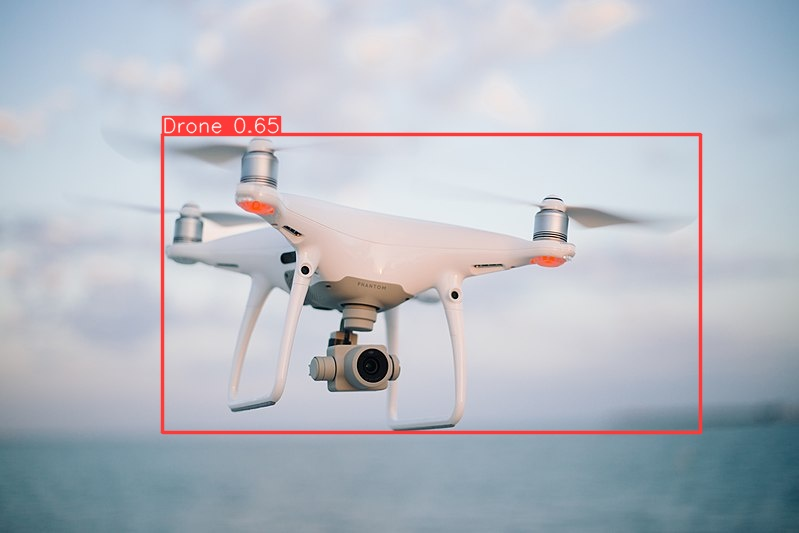

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict2/800px-Quadcopter_camera_drone_in_flight.jpg')[:5]:
      display(Image(filename=image_path, height=600))
      print("\n")